##### This notebok is intended to explain important features and create an explainable model.
#### Please refer to telcomchurncasestudy.ipynb for models that needed better accuracy. (Kaggle submission)

In [408]:
#Importing required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [410]:
telcom_data = pd.read_csv('data/train.csv')
telcom_data.set_index('id', inplace=True)

# Exploratory Data Analysis

In [412]:
telcom_data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [414]:
telcom_data.shape

(69999, 171)

In [416]:
pd.set_option('display.max_rows', None)
telcom_data.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_6                

### Data Cleaning

In [418]:
# clean the data for safe checks like empty columns and empty rows...
def sanity_clean_data(telcom_data):
    """
    Does sanity check and removes columns and rows with all NAs
    ----------
    telcom_data : dataframe
        dataframe on which sanity clean should be performed 
    """
    #columns with all empty values to be removed
    telcom_data.dropna(axis=1, how='all', inplace=True)
    
    #columns with all same values to be removed as they dont provide any insight
    cols_nounique = [i for i in telcom_data.columns if telcom_data[i].nunique()==1]
    telcom_data.drop(columns=cols_nounique, inplace=True, axis=1)
    print(cols_nounique)
    
    #rows with all NAs to be removed
    telcom_data.dropna(axis=0,how='all',inplace=True)
    
sanity_clean_data(telcom_data)    

[]


In [420]:
telcom_data.shape

(69999, 158)

There are 13 columns with all same values

In [422]:
#since the data is only from year 2014, converting it to day of the year.
# to keep it extensible for any other years, multiplying it with days in year + day in year
def reform_dates(telcom_data):
    """
    Convert date to a numeric data
    ----------
    telcom_data : dataframe
        dataframe on which reform date should be performed 
    """
    date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
    for col_name in date_cols:
        telcom_data[col_name] = pd.to_datetime(telcom_data[col_name]).dt.year*366 + pd.to_datetime(telcom_data[col_name]).dt.dayofyear
    return telcom_data
telcom_data = reform_dates(telcom_data)

In [424]:
telcom_data.columns[telcom_data.isna().any()]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=114)

In [426]:
telcom_data['fb_user_6'].unique()

array([nan,  1.,  0.])

In [428]:
#convert churn_probability to integral 
telcom_data['churn_probability'] = telcom_data.churn_probability.apply(lambda x: int(x))

In [430]:
#filter high-value customers

In [432]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telcom_data['total_data_rech_6'] = telcom_data.total_rech_data_6 * telcom_data.av_rech_amt_data_6
telcom_data['total_data_rech_7'] = telcom_data.total_rech_data_7 * telcom_data.av_rech_amt_data_7

In [434]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telcom_data['amt_data_6'] = telcom_data.total_rech_amt_6 + telcom_data.total_data_rech_6
telcom_data['amt_data_7'] = telcom_data.total_rech_amt_7 + telcom_data.total_data_rech_7

In [436]:
# calculate average recharge done by customer in June and July
telcom_data['av_amt_data_6_7'] = (telcom_data.amt_data_6 + telcom_data.amt_data_7)/2

In [438]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(telcom_data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 1215.0


In [440]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telcom_data_filtered = telcom_data.loc[telcom_data.av_amt_data_6_7 >= telcom_data.av_amt_data_6_7.quantile(0.7), :]
telcom_data_filtered = telcom_data.reset_index(drop=True)
telcom_data_filtered.shape

(69999, 163)

In [442]:
# delete variables created to filter high-value customers
telcom_data_filtered = telcom_data_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telcom_data_filtered.shape

(69999, 158)

In [444]:
telcom_data.columns[telcom_data.isnull().mean() > 0.70]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6',
       'amt_data_7', 'av_amt_data_6_7'],
      dtype='object')

In [446]:
telcom_data_filtered['arpu_diff'] = telcom_data_filtered.arpu_8 - ((telcom_data_filtered.arpu_6 + telcom_data_filtered.arpu_7)/2)

telcom_data_filtered['onnet_mou_diff'] = telcom_data_filtered.onnet_mou_8 - ((telcom_data_filtered.onnet_mou_6 + telcom_data_filtered.onnet_mou_7)/2)

telcom_data_filtered['offnet_mou_diff'] = telcom_data_filtered.offnet_mou_8 - ((telcom_data_filtered.offnet_mou_6 + telcom_data_filtered.offnet_mou_7)/2)

telcom_data_filtered['roam_ic_mou_diff'] = telcom_data_filtered.roam_ic_mou_8 - ((telcom_data_filtered.roam_ic_mou_6 + telcom_data_filtered.roam_ic_mou_7)/2)

telcom_data_filtered['roam_og_mou_diff'] = telcom_data_filtered.roam_og_mou_8 - ((telcom_data_filtered.roam_og_mou_6 + telcom_data_filtered.roam_og_mou_7)/2)

telcom_data_filtered['loc_og_mou_diff'] = telcom_data_filtered.loc_og_mou_8 - ((telcom_data_filtered.loc_og_mou_6 + telcom_data_filtered.loc_og_mou_7)/2)

telcom_data_filtered['std_og_mou_diff'] = telcom_data_filtered.std_og_mou_8 - ((telcom_data_filtered.std_og_mou_6 + telcom_data_filtered.std_og_mou_7)/2)

telcom_data_filtered['isd_og_mou_diff'] = telcom_data_filtered.isd_og_mou_8 - ((telcom_data_filtered.isd_og_mou_6 + telcom_data_filtered.isd_og_mou_7)/2)

telcom_data_filtered['spl_og_mou_diff'] = telcom_data_filtered.spl_og_mou_8 - ((telcom_data_filtered.spl_og_mou_6 + telcom_data_filtered.spl_og_mou_7)/2)

telcom_data_filtered['total_og_mou_diff'] = telcom_data_filtered.total_og_mou_8 - ((telcom_data_filtered.total_og_mou_6 + telcom_data_filtered.total_og_mou_7)/2)

telcom_data_filtered['loc_ic_mou_diff'] = telcom_data_filtered.loc_ic_mou_8 - ((telcom_data_filtered.loc_ic_mou_6 + telcom_data_filtered.loc_ic_mou_7)/2)

telcom_data_filtered['std_ic_mou_diff'] = telcom_data_filtered.std_ic_mou_8 - ((telcom_data_filtered.std_ic_mou_6 + telcom_data_filtered.std_ic_mou_7)/2)

telcom_data_filtered['isd_ic_mou_diff'] = telcom_data_filtered.isd_ic_mou_8 - ((telcom_data_filtered.isd_ic_mou_6 + telcom_data_filtered.isd_ic_mou_7)/2)

telcom_data_filtered['spl_ic_mou_diff'] = telcom_data_filtered.spl_ic_mou_8 - ((telcom_data_filtered.spl_ic_mou_6 + telcom_data_filtered.spl_ic_mou_7)/2)

telcom_data_filtered['total_ic_mou_diff'] = telcom_data_filtered.total_ic_mou_8 - ((telcom_data_filtered.total_ic_mou_6 + telcom_data_filtered.total_ic_mou_7)/2)

telcom_data_filtered['total_rech_num_diff'] = telcom_data_filtered.total_rech_num_8 - ((telcom_data_filtered.total_rech_num_6 + telcom_data_filtered.total_rech_num_7)/2)

telcom_data_filtered['total_rech_amt_diff'] = telcom_data_filtered.total_rech_amt_8 - ((telcom_data_filtered.total_rech_amt_6 + telcom_data_filtered.total_rech_amt_7)/2)

telcom_data_filtered['max_rech_amt_diff'] = telcom_data_filtered.max_rech_amt_8 - ((telcom_data_filtered.max_rech_amt_6 + telcom_data_filtered.max_rech_amt_7)/2)

telcom_data_filtered['total_rech_data_diff'] = telcom_data_filtered.total_rech_data_8 - ((telcom_data_filtered.total_rech_data_6 + telcom_data_filtered.total_rech_data_7)/2)

telcom_data_filtered['max_rech_data_diff'] = telcom_data_filtered.max_rech_data_8 - ((telcom_data_filtered.max_rech_data_6 + telcom_data_filtered.max_rech_data_7)/2)

telcom_data_filtered['av_rech_amt_data_diff'] = telcom_data_filtered.av_rech_amt_data_8 - ((telcom_data_filtered.av_rech_amt_data_6 + telcom_data_filtered.av_rech_amt_data_7)/2)

telcom_data_filtered['vol_2g_mb_diff'] = telcom_data_filtered.vol_2g_mb_8 - ((telcom_data_filtered.vol_2g_mb_6 + telcom_data_filtered.vol_2g_mb_7)/2)

telcom_data_filtered['vol_3g_mb_diff'] = telcom_data_filtered.vol_3g_mb_8 - ((telcom_data_filtered.vol_3g_mb_6 + telcom_data_filtered.vol_3g_mb_7)/2)

In [448]:
telcom_data = telcom_data_filtered

There are columns that are having more than 70% missing values.
but looking at these columns, it completely makes sense as they are not applicable. hence we need to impute them appropriately

Here, date of last recharge can be imputed with mode and other columns with zero as it is not applicable

In [450]:
#Lets look at the data dictionary and classify numeric vs categorical columns
cat_col_prefix = ['date_of_last_rech_','date_of_last_rech_data_']
cat_cols = []
for i in range(6,9):
    for prefix in cat_col_prefix:
        cat_cols.append(prefix+str(i))
cat_cols

['date_of_last_rech_6',
 'date_of_last_rech_data_6',
 'date_of_last_rech_7',
 'date_of_last_rech_data_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_8']

In [452]:
num_cols = [i for i in telcom_data.columns if i not in cat_cols]
num_cols.remove('churn_probability')

In [454]:
non_zero_cols = ['aon']

In [456]:
# change columns types
telcom_data[num_cols] = telcom_data[num_cols].apply(pd.to_numeric)
telcom_data[cat_cols] = telcom_data[cat_cols].apply(lambda column: column.astype("category"), axis=0)
telcom_data['churn_probability'] = telcom_data['churn_probability'].astype("category")

In [457]:
# A graphPlotter function which plots the graphs based on the parameters passed
import math
def graphPlotter(graphType,telcom_data,x,y):
    """
    Plots graphs based on the type of graph and returns a grid of graphs
    ----------
    graphType: the type of graph to be plotted 
    telcom_data: dataframe
    x: x axis data of graph
    y: y axis data of graph
        dataframe on which sanity clean should be performed 
    """
    plt.figure(figsize=[18, math.ceil(len(x)/2)*6])
    for i, col in enumerate(x, 1):
        try:
            plt.subplot(math.ceil(len(x)/2),2,i)
            title_text= f'{col} vs {y}'
            x_label= f'{col}'
            if graphType == 'scatterplot':
                fig= sns.scatterplot(data= telcom_data, x=col, y=y)
            elif graphType == 'distplot':
                fig = sns.distplot(telcom_data[col])
            else:
                nan_data = telcom_data[~telcom_data.isnan()]
                fig= sns.boxplot(data= telcom_data, x=col, y=y)
            fig.set_title(title_text, fontdict= { 'fontsize': 15})
            fig.set_xlabel(x_label, fontdict= {'fontsize': 8})
        except:
            print(i,col)
    plt.show()

### Imputation

In [458]:
#Missing values imputation:
# impute all numeric cols with median and categorical ones with mode
def impute_missing_values(data):
    """
    Imputes missing values based on data type
    ----------
    data : dataframe
        dataframe on which imputation should be performed 
    """
    #impute non applicable data with zeros
    data[non_zero_cols] = data.filter(non_zero_cols).fillna(data.median(numeric_only=True).iloc[0])
    data[num_cols] = data.filter(num_cols).fillna(0)
    data[cat_cols] = data.filter(cat_cols).fillna(data.mode().iloc[0])        
    return data
telcom_data = impute_missing_values(telcom_data)


In [459]:
telcom_data.columns[telcom_data.isna().any()]

Index([], dtype='object')

In [460]:
telcom_data.shape

(69999, 181)

## Data Visualization

In [ ]:
graphPlotter('distplot',telcom_data,num_cols,'churn_probability')

1 arpu_6
2 arpu_7
3 arpu_8
4 onnet_mou_6
5 onnet_mou_7
6 onnet_mou_8
7 offnet_mou_6
8 offnet_mou_7
9 offnet_mou_8
10 roam_ic_mou_6
11 roam_ic_mou_7
12 roam_ic_mou_8
13 roam_og_mou_6
14 roam_og_mou_7
15 roam_og_mou_8
16 loc_og_t2t_mou_6
17 loc_og_t2t_mou_7
18 loc_og_t2t_mou_8
19 loc_og_t2m_mou_6
20 loc_og_t2m_mou_7
21 loc_og_t2m_mou_8
22 loc_og_t2f_mou_6
23 loc_og_t2f_mou_7
24 loc_og_t2f_mou_8
25 loc_og_t2c_mou_6
26 loc_og_t2c_mou_7
27 loc_og_t2c_mou_8
28 loc_og_mou_6
29 loc_og_mou_7
30 loc_og_mou_8
31 std_og_t2t_mou_6
32 std_og_t2t_mou_7
33 std_og_t2t_mou_8
34 std_og_t2m_mou_6
35 std_og_t2m_mou_7
36 std_og_t2m_mou_8
37 std_og_t2f_mou_6
38 std_og_t2f_mou_7
39 std_og_t2f_mou_8
40 std_og_mou_6
41 std_og_mou_7
42 std_og_mou_8
43 isd_og_mou_6
44 isd_og_mou_7
45 isd_og_mou_8
46 spl_og_mou_6
47 spl_og_mou_7
48 spl_og_mou_8
49 og_others_6
50 og_others_7
51 og_others_8
52 total_og_mou_6
53 total_og_mou_7
54 total_og_mou_8
55 loc_ic_t2t_mou_6
56 loc_ic_t2t_mou_7
57 loc_ic_t2t_mou_8
58 loc_ic_t2m

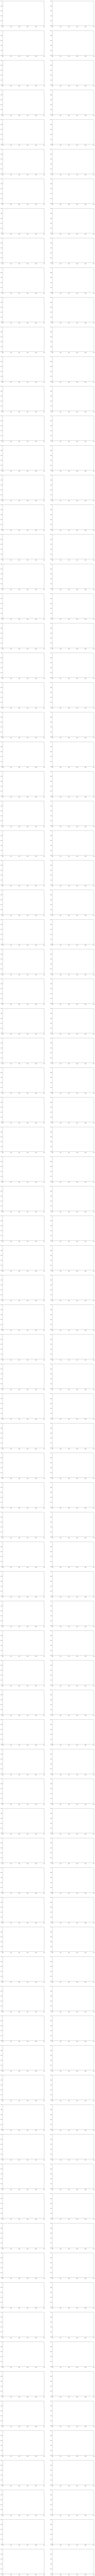

In [461]:
graphPlotter('boxplot',telcom_data,num_cols,'churn_probability')

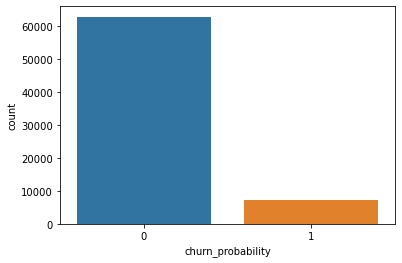

In [330]:
# imbalanced class
sns.countplot(x = 'churn_probability', data = telcom_data)
plt.show()

In [331]:
telcom_data['churn_probability'].nunique()

2

In [332]:
telcom_data[cat_cols] = telcom_data[cat_cols].apply(pd.to_numeric)

In [333]:
from sklearn.model_selection import train_test_split

# X = telcom_data.iloc[:,0:telcom_data.shape[1]-1]
# y = telcom_data['churn_probability']
y = telcom_data.pop('churn_probability')
X = telcom_data
# since we have 70000 data points, putting 10k aside for test and 60k for train
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [334]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((52499, 180), (17500, 180), (52499,), (17500,))

In [335]:
X_train.dtypes

arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            float64
loc_og_t2f_mou_7            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_6            float64
loc_og_t2c_mou_7            float64
loc_og_t2c_mou_8            float64
loc_og_mou_6                

## Class imbalancing handling using SMOTE

In [336]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.ravel().shape))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))


Before OverSampling, the shape of train_X: (52499, 180)
Before OverSampling, the shape of train_y: (52499,) 

Before OverSampling, counts of label '1': 5326
Before OverSampling, counts of label '0': 47173 

After OverSampling, the shape of train_X: (94346, 180)
After OverSampling, the shape of train_y: (94346,) 

After OverSampling, counts of label '1': 47173
After OverSampling, counts of label '0': 47173


### Scaling data

In [337]:
from sklearn.preprocessing import StandardScaler
#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### common util methods

In [355]:
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score,plot_roc_curve
def evaluate_model(model, X, y):
    """
    prints the model performance results 
    ----------
    model : model
        model on which the performance has to be evaluated
    """
    y_pred = model.predict(X)
    print('Confusion Matrix: ',confusion_matrix(y, y_pred))
    print('Precision: ',precision_score(y, y_pred, average=None))
    print('Accuracy: ',accuracy_score(y, y_pred))
    plot_roc_curve(model, X, y, drop_intermediate=False)
    plt.show()

In [339]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
def get_dt_graph(dt_classifier):
    """
    returns a visual representation of the Decision tree model created
    ----------
    telcom_data : dataframe
        dataframe on which sanity clean should be performed 
    """
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns,
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

### Logistic Regression

Train data statistics:
Confusion Matrix:  [[40920  6253]
 [ 4520 42653]]
Precision:  [0.90052817 0.87214248]
Accuracy:  0.885813918979077


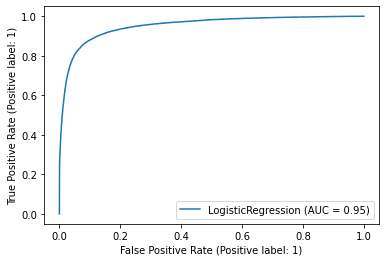

test data statistics:
Confusion Matrix:  [[13615  2079]
 [  406  1400]]
Precision:  [0.97104343 0.40241449]
Accuracy:  0.858


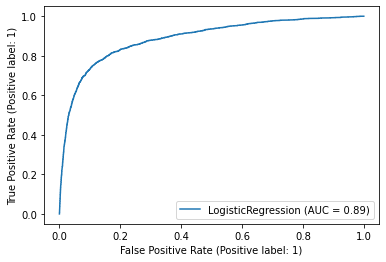

In [358]:
###We import the model that will be used. 
from sklearn.linear_model import LogisticRegression 
# Create an instance of the model. 
logreg = LogisticRegression() 
# Training the model. 
logreg.fit(X_train,y_train) 
# Do prediction. 
print("Train data statistics:");
evaluate_model(logreg, X_train, y_train)
print("test data statistics:");
evaluate_model(logreg, X_test, y_test)

### Simple Decision Tree

In [343]:
from sklearn.tree import DecisionTreeClassifier

dt_cf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=10)

dt_cf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

Train data statistics:
Confusion Matrix:  [[42834  4339]
 [ 5562 41611]]
Precision:  [0.88507315 0.90557127]
Accuracy:  0.8950564941809933


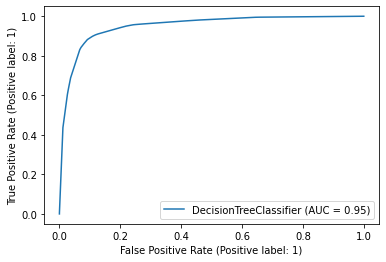

test data statistics:
Confusion Matrix:  [[14272  1422]
 [  391  1415]]
Precision:  [0.97333424 0.4987663 ]
Accuracy:  0.8964


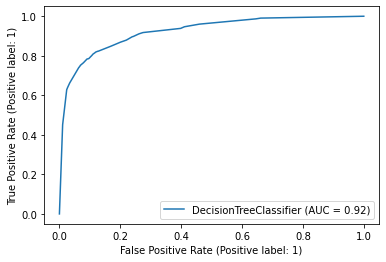

In [359]:

# Do prediction. 
print("Train data statistics:");
evaluate_model(dt_cf, X_train, y_train)
print("test data statistics:");
evaluate_model(dt_cf, X_test, y_test)

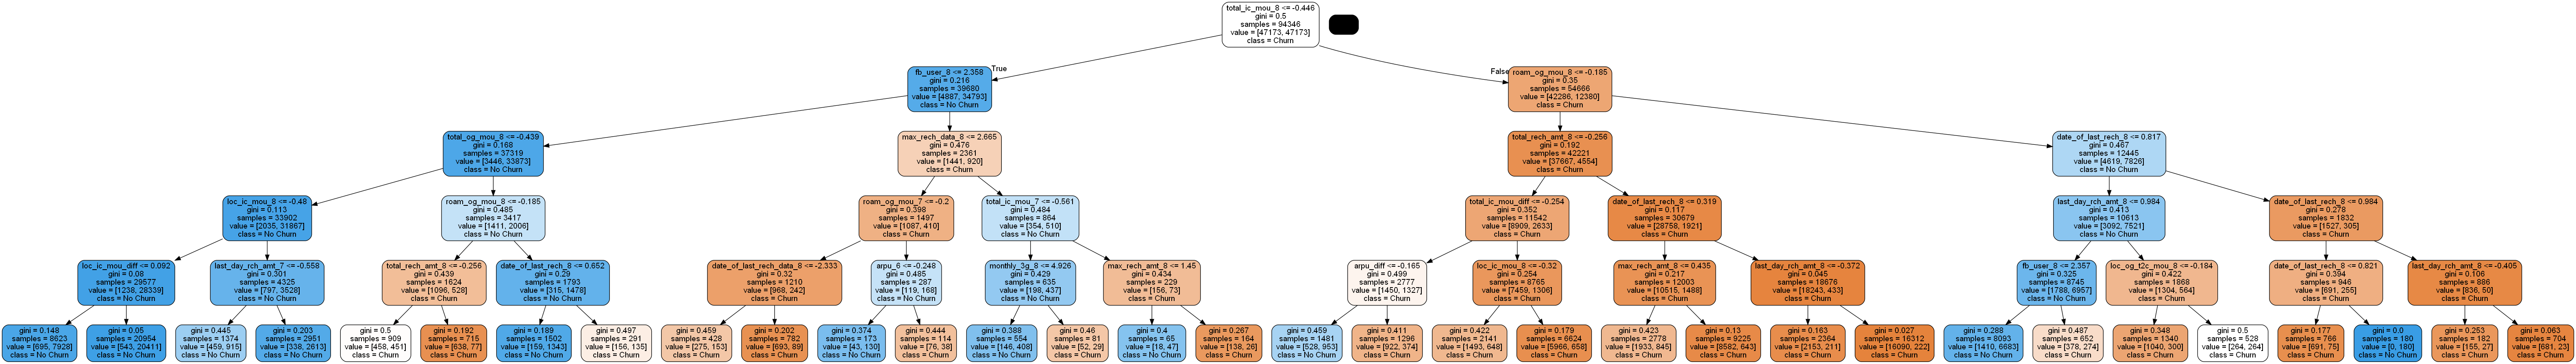

In [345]:
gph = get_dt_graph(dt_cf)
Image(gph.create_png())

### Decision tree with hyper parameter tuning:

In [346]:
from sklearn.model_selection import GridSearchCV
classifier_rf = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
# params = {
#     'max_depth': [4, 6, 10,20,30],
#     'min_samples_leaf': [100, 500, 1000, 5000]
# }

params = {    
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],    
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=2, scoring = 'roc_auc')

In [347]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 250, 500, 800,
                                              1000]},
             scoring='roc_auc', verbose=2)

In [348]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=30, min_samples_leaf=50, random_state=42)

In [349]:
grid_search.best_score_

0.9645061831535582

Train data statistics:
Confusion Matrix:  [[43297  3876]
 [ 3131 44042]]
Precision:  [0.93256225 0.91911182]
Accuracy:  0.9257308205965277


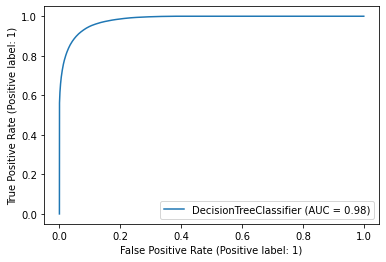

test data statistics:
Confusion Matrix:  [[14249  1445]
 [  406  1400]]
Precision:  [0.97229614 0.49209139]
Accuracy:  0.8942285714285715


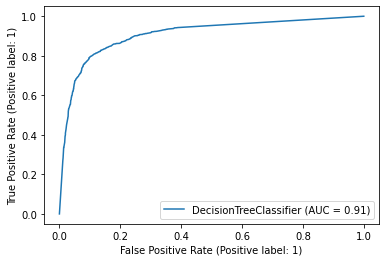

In [360]:

# Do prediction. 
print("Train data statistics:");
evaluate_model(dt_best, X_train, y_train)
print("test data statistics:");
evaluate_model(dt_best, X_test, y_test)

In [353]:
dt_best

DecisionTreeClassifier(max_depth=30, min_samples_leaf=50, random_state=42)

### Inferences: 
From both the above models these are the most important factors

- total_ic_mou_8 acts as the first important factor
- fb_user and roam_og are the next important ones
- dateoflastrecharge loc_ic_mou and offnet_mou are also important factors

## This notebok is intended to explain important features and create an explainable model.
## Please refer to telcomchurncasestudy.ipynb for models that needed better accuracy. (Kaggle submission)